In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
match_df=pd.read_csv('IPL Dataset/IPL Matches 2008-2020.csv')
ball_by_balldf=pd.read_csv('IPL Dataset/IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match_df[:3]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar


In [4]:
ball_by_balldf[:5]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [6]:
match_df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
ball_by_balldf.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [8]:
match_df.shape

(816, 17)

In [9]:
ball_by_balldf.shape

(193468, 18)

In [10]:
match_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
ball_by_balldf.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [12]:
#Unique Cities
print(match_df.city.unique())

['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [13]:
# Teams Participated
print(match_df.team1.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [14]:
# There are two rising pune supergiant .Lets merge to one
match_df.replace(['Rising Pune Supergiant'],'Rising Pune Supergiants',inplace=True)
print(match_df.team1.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Delhi Capitals']


In [15]:
print(match_df.team1.unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Delhi Capitals']


In [16]:
match_df['Season']=match_df.date.str[:4]

In [17]:
match_df.Season.unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [18]:
season_matches=match_df.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'count'})
season_matches.set_index('Season',inplace=True)
season_matches

,count
Season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


Text(0.5, 1.0, 'Number of matches in Season')

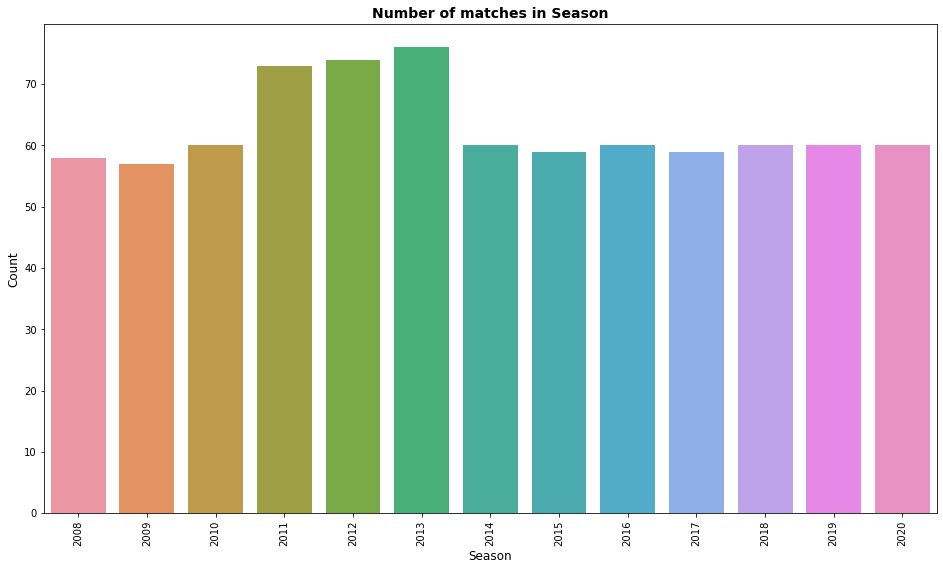

In [19]:
plt.figure(figsize=(16,9))
sns.countplot(match_df['Season'])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Number of matches in Season',fontsize=14,fontweight='bold')

In [20]:
season_df=match_df[['id','Season']].merge(ball_by_balldf,left_on='id',right_on='id',how='left').drop('id',axis=1)
season_df[:3]

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


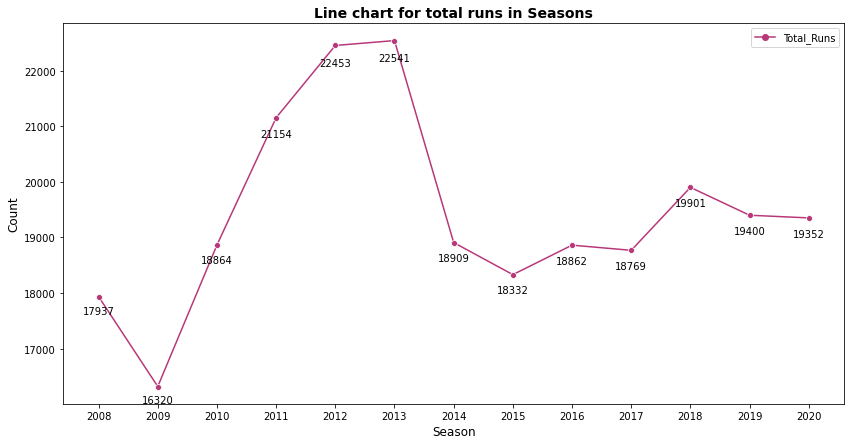

In [21]:
plt.figure(figsize=(14,7))
season_runs=season_df.groupby(['Season'])['total_runs'].sum().reset_index().rename(columns={'total_runs':'Total_Runs'})
season_runs.set_index('Season',inplace=True)
ax1=sns.lineplot(data=season_runs,palette='magma',markers=True)
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Line chart for total runs in Seasons',fontsize=14,fontweight='bold')
for pos, row in season_runs.iterrows():
    ax1.annotate(f"{row['Total_Runs']}",(pos, row['Total_Runs']*0.99),color='k', va='top', ha='center')

In [22]:
season_matches[:3]

,count
Season,
2008,58
2009,57
2010,60


In [23]:
season_runs[:3]

,Total_Runs
Season,
2008,17937
2009,16320
2010,18864


In [24]:
runs_per_matches=pd.concat([season_matches,season_runs.iloc[:,0]],axis=1)
runs_per_matches['Score_per_match']=runs_per_matches['Total_Runs']/runs_per_matches['count']
runs_per_matches

,count,Total_Runs,Score_per_match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


Text(0.5, 1.0, 'No of Toss won by each team')

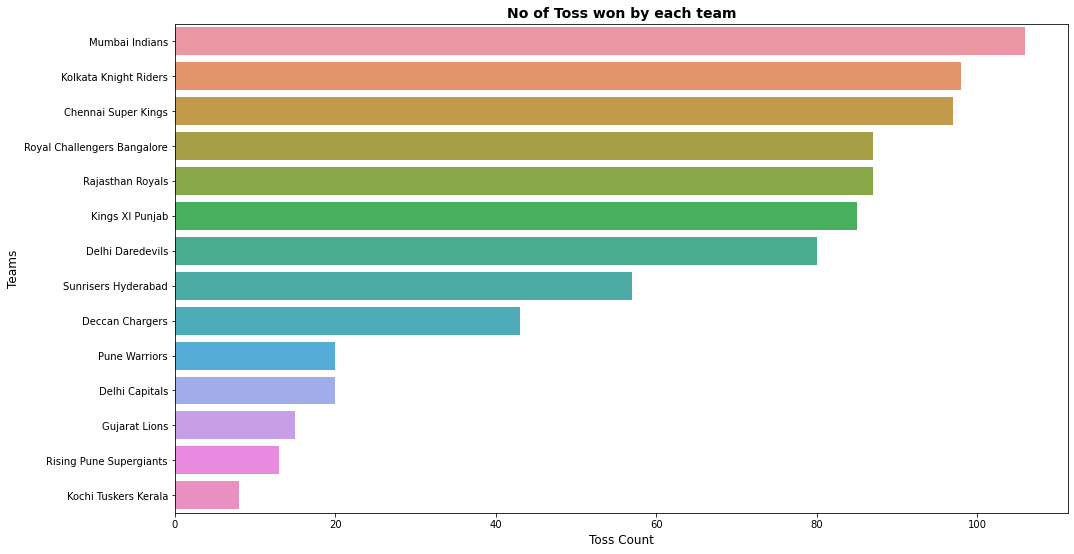

In [25]:
plt.figure(figsize=(16,9))
un_count=match_df['toss_winner'].value_counts()
sns.barplot(y=un_count.index,x=un_count,data=match_df)
plt.xlabel('Toss Count',fontsize=12)
plt.ylabel('Teams',fontsize=12)
plt.title('No of Toss won by each team',fontweight='bold',fontsize=14)

Text(0, 0.5, 'Count')

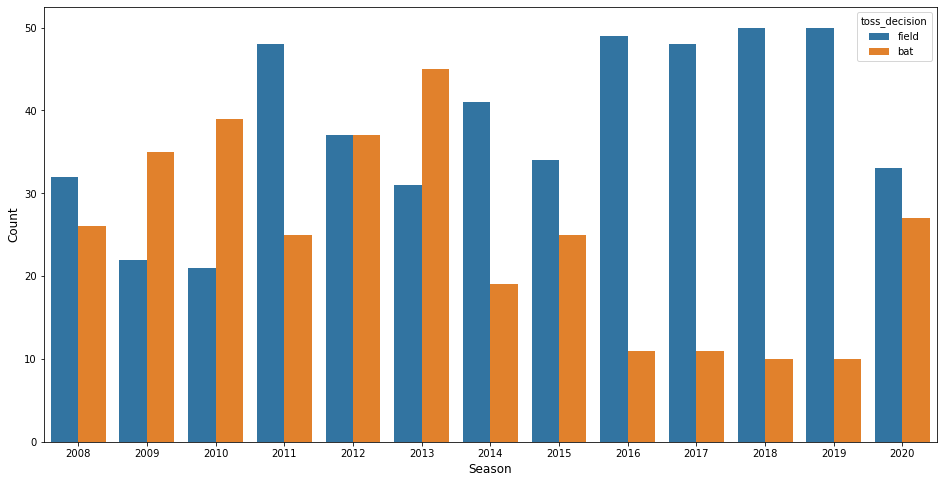

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(x=match_df['Season'],hue=match_df['toss_decision'])
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)

In [27]:
match_df['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [28]:
# Frequent Venue where match won by runs
match_df[match_df['result']!='wickets'].venue.mode()

0    Feroz Shah Kotla
Name: venue, dtype: object

In [29]:
# Frequent Venue where match won by wickets
match_df[match_df['result']=='wickets'].venue.mode()

0    Eden Gardens
Name: venue, dtype: object

In [30]:
# Frequent Venue where match won by tie
match_df[match_df['result']=='tie'].venue.mode()

0    Dubai International Cricket Stadium
Name: venue, dtype: object

In [31]:
# For any given IPL team which place is best when they win toss
match_df[['toss_winner','venue','winner']].value_counts()

toss_winner            venue                                    winner               
Kolkata Knight Riders  Eden Gardens                             Kolkata Knight Riders    24
Mumbai Indians         Wankhede Stadium                         Mumbai Indians           23
Chennai Super Kings    MA Chidambaram Stadium, Chepauk          Chennai Super Kings      22
Rajasthan Royals       Sawai Mansingh Stadium                   Rajasthan Royals         17
Delhi Daredevils       Feroz Shah Kotla                         Delhi Daredevils         13
                                                                                         ..
Kings XI Punjab        Maharashtra Cricket Association Stadium  Rajasthan Royals          1
                                                                Delhi Daredevils          1
                       MA Chidambaram Stadium, Chepauk          Kings XI Punjab           1
                                                                Chennai Super Kings   

In [32]:
#Team which has the most wins by batting second
match_df[match_df['result']=='wickets'].winner.mode()

0    Kolkata Knight Riders
Name: winner, dtype: object

In [33]:
#Team which has the most wins by batting first
match_df[match_df['result']=='runs'].winner.mode()

0    Mumbai Indians
Name: winner, dtype: object

<AxesSubplot:ylabel='count'>

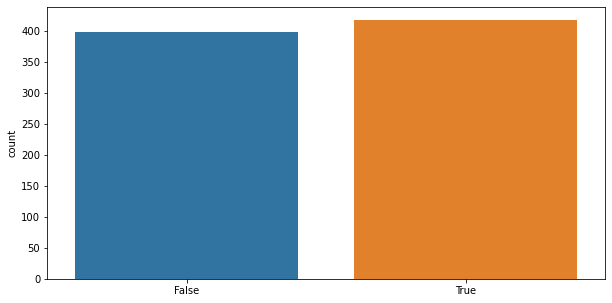

In [34]:
toss=match_df['winner']==match_df['toss_winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

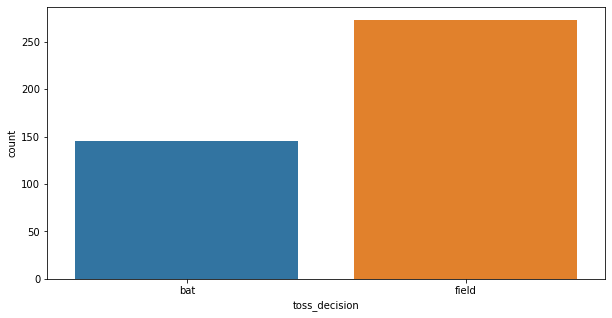

In [35]:
plt.figure(figsize=(10,5))
win=match_df[match_df['winner']==match_df['toss_winner']].toss_decision
sns.countplot(win)

In [50]:
#Dhoni dataframe
player=eval(input("Enter the Player Name: "))
player_df=ball_by_balldf[ball_by_balldf['batsman']==player]
player_df[:3]

Enter the Player Name: 'MEK Hussey'


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
227,335983,1,19,5,MEK Hussey,S Badrinath,JR Hopes,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
228,335983,1,19,6,MEK Hussey,S Badrinath,JR Hopes,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
242,335983,1,9,5,MEK Hussey,SK Raina,K Goel,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


Text(0.5, 1.0, 'MEK Hussey Dismissal Kind')

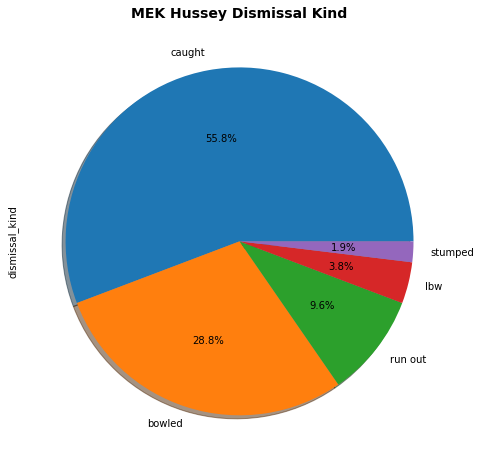

In [51]:
plt.figure(figsize=(16,8))
player_df['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title(f"{player} Dismissal Kind",fontsize=14,fontweight='bold')

In [38]:
dhoni_run=dhoni_df['batsman_runs'].value_counts().reset_index().rename(columns={'index':'Run','batsman_runs':'Count'}).sort_values('Run')
dhoni_run.set_index('Run',inplace=True)
dhoni_run

,Count
Run,
0,1225
1,1409
2,315
3,15
4,313
6,216


In [39]:
#Match that had highest result_margin of runs where team lost
match_df[match_df['result_margin']==match_df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [40]:
high_scorer=ball_by_balldf.groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Total_Runs'})
high_scorer.sort_values('Total_Runs',ascending=False,inplace=True)
high_scorer[:10]


,batsman,Total_Runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


In [41]:
MOM_Awards=match_df.groupby(['player_of_match']).size().reset_index().rename(columns={0:'Total_Awards'})
MOM_Awards.sort_values(by='Total_Awards',ascending=False,inplace=True)
MOM_Awards[:10]

,player_of_match,Total_Awards
10,AB de Villiers,23
35,CH Gayle,22
173,RG Sharma,18
44,DA Warner,17
138,MS Dhoni,17
229,YK Pathan,16
206,SR Watson,16
194,SK Raina,14
223,V Kohli,13
58,G Gambhir,13
